In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pickle
from collections import OrderedDict

from scipy.optimize import curve_fit

def straight_line(x,m,b):
    return(m*x+b)

In [2]:
#####################
## Compaction data ##
#####################

p2_150_1 = pickle.load(open("p2_K49A_150nm_fc1s1_compact.p", "rb")) 
p2_150_2 = pickle.load(open("p2_K49A_150nm_fc1s2_compact.p", "rb")) 
p2_150_3 = pickle.load(open("p2_K49A_150nm_fc2s1_compact.p", "rb")) 
p2_150_4 = pickle.load(open("p2_K49A_150nm_fc2s2_compact.p", "rb")) 

p2_175_1 = pickle.load(open("p2_K49A_175nm_fc1s1_compact.p", "rb")) 
p2_175_2 = pickle.load(open("p2_K49A_175nm_fc1s2_compact.p", "rb")) 
p2_175_3 = pickle.load(open("p2_K49A_175nm_fc2s1_compact.p", "rb")) 
p2_175_4 = pickle.load(open("p2_K49A_175nm_fc2s2_compact.p", "rb"))

p2_200_1 = pickle.load(open("p2_K49A_200nm_fc1s1_compact.p", "rb")) 
p2_200_2 = pickle.load(open("p2_K49A_200nm_fc1s2_compact.p", "rb")) 
p2_200_3 = pickle.load(open("p2_K49A_200nm_fc2s1_compact.p", "rb")) 
p2_200_4 = pickle.load(open("p2_K49A_200nm_fc2s2_compact.p", "rb"))

p2_225_1 = pickle.load(open("p2_K49A_225nm_fc1s1_compact.p", "rb")) 
p2_225_2 = pickle.load(open("p2_K49A_225nm_fc1s2_compact.p", "rb")) 
p2_225_3 = pickle.load(open("p2_K49A_225nm_fc2s1_compact.p", "rb")) 
p2_225_4 = pickle.load(open("p2_K49A_225nm_fc2s2_compact.p", "rb"))

p2_250_1 = pickle.load(open("p2_K49A_250nm_fc1s1_compact.p", "rb")) 
p2_250_2 = pickle.load(open("p2_K49A_250nm_fc1s2_compact.p", "rb")) 
p2_250_3 = pickle.load(open("p2_K49A_250nm_fc2s1_compact.p", "rb")) 
p2_250_4 = pickle.load(open("p2_K49A_250nm_fc2s2_compact.p", "rb"))
p2_250_5 = pickle.load(open("p2_K49A_250nm_fc3s1_compact.p", "rb")) 
p2_250_6 = pickle.load(open("p2_K49A_250nm_fc3s2_compact.p", "rb"))



#######################
## Decompaction data ##
#######################

D_p2_175_1 = pickle.load(open("p2_K49A_175nm_fc1s1_decompaction.p", "rb")) 
D_p2_175_2 = pickle.load(open("p2_K49A_175nm_fc1s2_decompaction.p", "rb")) 
D_p2_175_3 = pickle.load(open("p2_K49A_175nm_fc2s2_decompaction.p", "rb"))

D_p2_200_1 = pickle.load(open("p2_K49A_200nm_fc1s1_decompaction.p", "rb")) 
D_p2_200_2 = pickle.load(open("p2_K49A_200nm_fc1s2_decompaction.p", "rb")) 
D_p2_200_3 = pickle.load(open("p2_K49A_200nm_fc2s1_decompaction.p", "rb")) 
D_p2_200_4 = pickle.load(open("p2_K49A_200nm_fc2s2_decompaction.p", "rb"))

D_p2_225_1 = pickle.load(open("p2_K49A_225nm_fc1s1_decompaction.p", "rb")) 
D_p2_225_2 = pickle.load(open("p2_K49A_225nm_fc1s2_decompaction.p", "rb")) 
D_p2_225_3 = pickle.load(open("p2_K49A_225nm_fc2s1_decompaction.p", "rb")) 
D_p2_225_4 = pickle.load(open("p2_K49A_225nm_fc2s2_decompaction.p", "rb"))

D_p2_250_1 = pickle.load(open("p2_K49A_250nm_fc1s1_decompaction.p", "rb")) 
D_p2_250_2 = pickle.load(open("p2_K49A_250nm_fc2s1_decompaction.p", "rb")) 
D_p2_250_3 = pickle.load(open("p2_K49A_250nm_fc2s2_decompaction.p", "rb"))
D_p2_250_4 = pickle.load(open("p2_K49A_250nm_fc3s1_decompaction.p", "rb")) 
D_p2_250_5 = pickle.load(open("p2_K49A_250nm_fc3s2_decompaction.p", "rb"))



Individual Average Plots
----

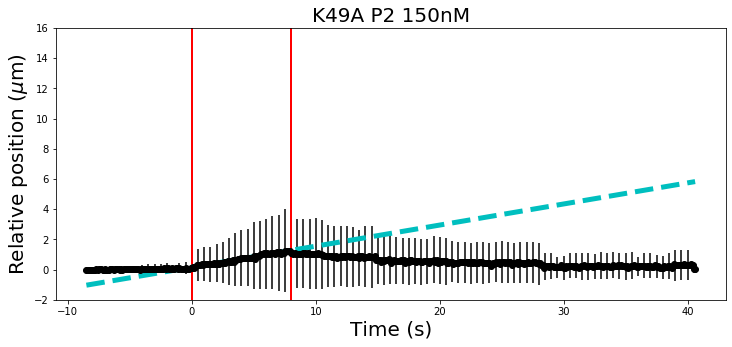

average velocity:  0.14 um/s
Number of traces = 74
Offset position = 54.044403485101874


In [5]:
D = OrderedDict()
count = 0
y_offsets = []
shift_t = [21.00,21.00,22.60,22.60]
shift_t_count = 0
for dataset,velo in [p2_150_1,p2_150_2,p2_150_3,p2_150_4]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [round((i*0.1)-shift_t[shift_t_count],1) for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
    shift_t_count+=1
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

fitrange = 80
framerate = 0.1
data = [t,a,s]
pickle.dump(data, open("p2_K49A_150_average.p", "wb"))

tindex = t.index(0) 
p,e = curve_fit(straight_line,t[tindex:tindex+fitrange],
                a[tindex:tindex+fitrange])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=fitrange*framerate,color = "red", linewidth = 2)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
ax1.plot(t,straight_line(np.array(t),*p), "c--", linewidth = 5)

#ax1.set_xlim(-3,40)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P2 150nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset position = "+str(np.mean(y_offsets)))


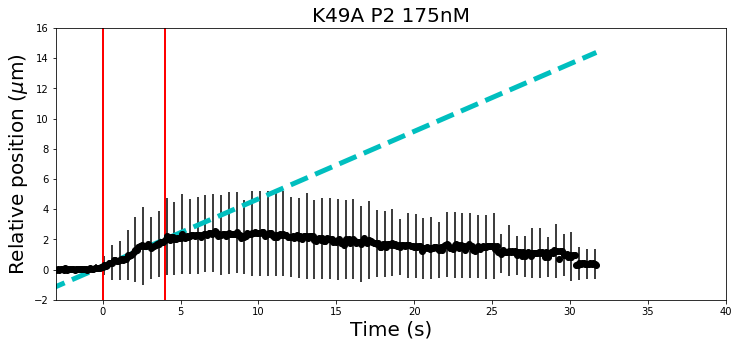

average velocity:  0.45 um/s
Number of traces = 54
Offset position = 54.37959021689732


In [6]:
D = OrderedDict()
count = 0
y_offsets = []
shift_t = [21.10,21.10,25.50,25.50]
shift_t_count = 0
for dataset,velo in [p2_175_1,p2_175_2,p2_175_3,p2_175_4]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [round((i*0.1)-shift_t[shift_t_count],1) for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
    shift_t_count+=1
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

fitrange = 40
framerate = 0.1
data = [t,a,s]
pickle.dump(data, open("p2_K49A_175_average.p", "wb"))

tindex = t.index(0) 
p,e = curve_fit(straight_line,t[tindex:tindex+fitrange],
                a[tindex:tindex+fitrange])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=fitrange*framerate,color = "red", linewidth = 2)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
ax1.plot(t,straight_line(np.array(t),*p), "c--", linewidth = 5)

ax1.set_xlim(-3,40)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P2 175nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset position = "+str(np.mean(y_offsets)))



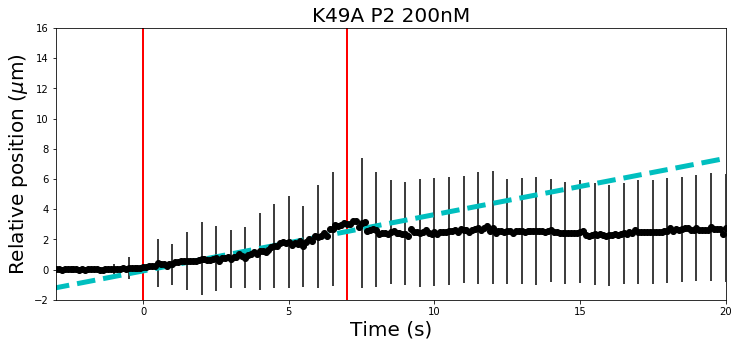

average velocity:  0.37 um/s
Number of traces = 62
Offset position = 55.001546208519606


In [8]:
D = OrderedDict()
count = 0
y_offsets = []
shift_t = [20.50,20.50,22.50,22.50]
shift_t_count = 0
for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [round((i*0.1)-shift_t[shift_t_count],1) for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
    shift_t_count+=1
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

fitrange = 70
framerate = 0.1
data = [t,a,s]
pickle.dump(data, open("p2_K49A_200_average.p", "wb"))

tindex = t.index(0) 
p,e = curve_fit(straight_line,t[tindex:tindex+fitrange],
                a[tindex:tindex+fitrange])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=fitrange*framerate,color = "red", linewidth = 2)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
ax1.plot(t,straight_line(np.array(t),*p), "c--", linewidth = 5)

ax1.set_xlim(-3,20)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P2 200nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset position = "+str(np.mean(y_offsets)))


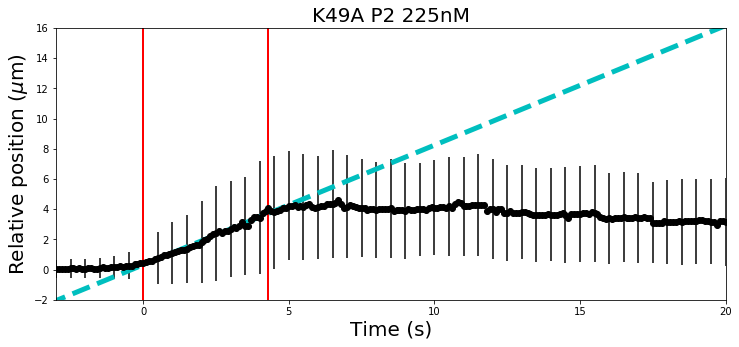

average velocity:  0.79 um/s
Number of traces = 64
Offset position = 53.419923413590915


In [9]:
D = OrderedDict()
count = 0
y_offsets = []
shift_t = [24.00,24.00,22.10,22.10]
shift_t_count = 0
for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [round((i*0.1)-shift_t[shift_t_count],1) for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
    shift_t_count+=1
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

fitrange = 43
framerate = 0.1
data = [t,a,s]
pickle.dump(data, open("p2_K49A_225_average.p", "wb"))

tindex = t.index(0) 
p,e = curve_fit(straight_line,t[tindex:tindex+fitrange],
                a[tindex:tindex+fitrange])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=fitrange*framerate,color = "red", linewidth = 2)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
ax1.plot(t,straight_line(np.array(t),*p), "c--", linewidth = 5)

ax1.set_xlim(-3,20)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P2 225nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset position = "+str(np.mean(y_offsets)))

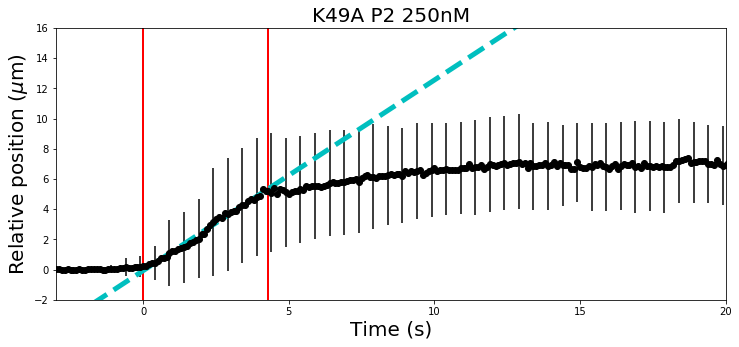

average velocity:  1.26 um/s
Number of traces = 65
Offset position = 55.44656782616257


In [10]:
D = OrderedDict()
count = 0
y_offsets = []
shift_t = [21.00,21.00,22.60,22.60,22.10,22.10]
shift_t_count = 0
for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,
                     p2_250_4,p2_250_5,p2_250_6]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [round((i*0.1)-shift_t[shift_t_count],1) for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
    shift_t_count+=1
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

fitrange = 43
framerate = 0.1
data = [t,a,s]
pickle.dump(data, open("p2_K49A_250_average.p", "wb"))

tindex = t.index(0) 
p,e = curve_fit(straight_line,t[tindex:tindex+fitrange],
                a[tindex:tindex+fitrange])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=fitrange*framerate,color = "red", linewidth = 2)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
ax1.plot(t,straight_line(np.array(t),*p), "c--", linewidth = 5)

ax1.set_xlim(-3,20)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P2 250nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset position = "+str(np.mean(y_offsets)))

Altogether Average Plot
----

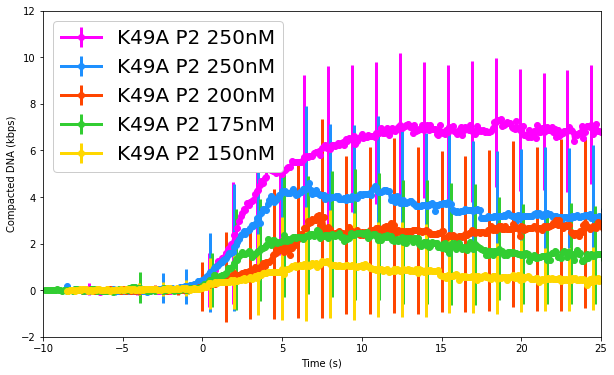

In [13]:
t_150,a_150,s_150 = pickle.load(open("p2_K49A_150_average.p", "rb"))
t_175,a_175,s_175 = pickle.load(open("p2_K49A_175_average.p", "rb"))
t_200,a_200,s_200 = pickle.load(open("p2_K49A_200_average.p", "rb"))
t_225,a_225,s_225 = pickle.load(open("p2_K49A_225_average.p", "rb"))
t_250,a_250,s_250 = pickle.load(open("p2_K49A_250_average.p", "rb"))


fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(111)


ax1.errorbar(t_250,a_250, yerr = s_250, 
             marker = "o", linewidth = 3, 
             errorevery=15, color = "fuchsia",
             label = "K49A P2 250nM")
ax1.errorbar(t_225,a_225, yerr = s_225, 
             marker = "o", linewidth = 3, 
             errorevery=15, color = "dodgerblue",
             label = "K49A P2 250nM")
ax1.errorbar(t_200,a_200, yerr = s_200, 
             marker = "o", linewidth = 3, 
             errorevery=15, color = "orangered",
             label = "K49A P2 200nM")
ax1.errorbar(t_175,a_175, yerr = s_175, 
             marker = "o", linewidth = 3, 
             errorevery=15, color = "limegreen", 
             label = "K49A P2 175nM")
ax1.errorbar(t_150,a_150, yerr = s_150, 
             marker = "o", linewidth = 3, 
             errorevery=15, color = "gold", 
             label = "K49A P2 150nM")


ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Compacted DNA (kbps)")

ax1.set_xlim(-10,25)
ax1.set_ylim(-2,12)
plt.legend(loc=2, framealpha = 1, fontsize = 20)
#plt.savefig("abc_out.pdf", format = "pdf")
plt.show()


Individual Busy Plots
----

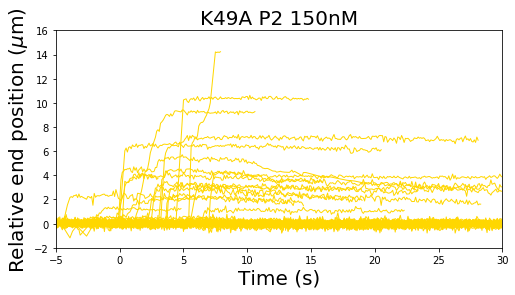

In [15]:
fig = plt.figure(figsize = (8,4))

shift_t = [21.00,21.00,22.60,22.60]
shift_t_count = 0
ax1 = fig.add_subplot(111)
for dataset,velo in [p2_150_1,p2_150_2,p2_150_3,p2_150_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "gold",
                 linewidth = 1)
    shift_t_count+=1
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-5,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P2 150nM", fontsize = 20)

plt.show()

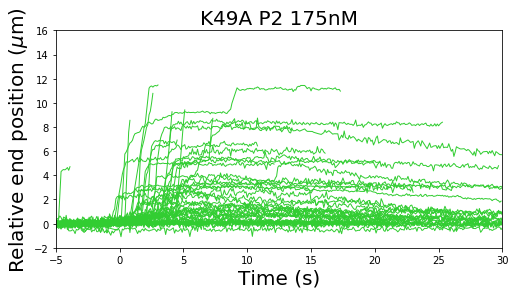

In [16]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

shift_t = [21.10,21.10,25.50,25.50]
shift_t_count = 0
for dataset,velo in [p2_175_1,p2_175_2,p2_175_3,p2_175_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "limegreen",
                 linewidth = 1)
    shift_t_count+=1
ax1.set_ylim(-2,16)
ax1.set_xlim(-5,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P2 175nM", fontsize = 20)
plt.show()

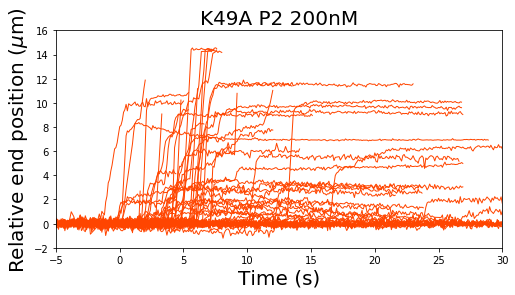

In [17]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

shift_t = [20.50,20.50,22.50,22.50]
shift_t_count = 0
for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "orangered",
                 linewidth = 1)
    shift_t_count+=1
ax1.set_ylim(-2,16)
ax1.set_xlim(-5,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P2 200nM", fontsize = 20)
plt.show()

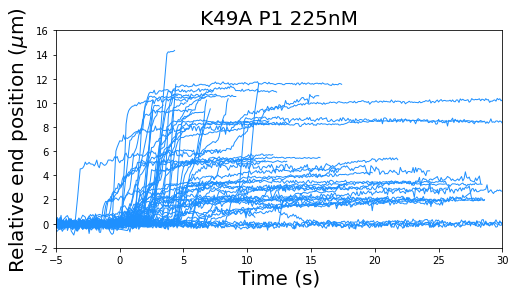

In [19]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

shift_t = [24.00,24.00,22.10,22.10]
shift_t_count = 0
for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "dodgerblue",
                 linewidth = 1)
    shift_t_count+=1
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-5,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 225nM", fontsize = 20)
plt.show()

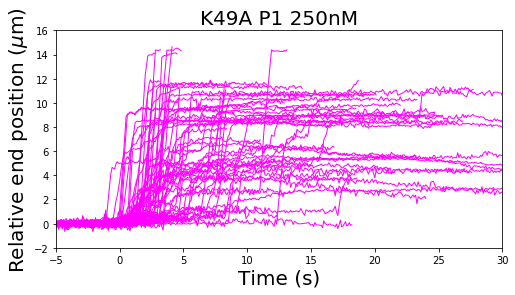

In [20]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

shift_t = [21.00,21.00,22.60,22.60,22.10,22.10]
shift_t_count = 0
for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,
                     p2_250_4,p2_250_5,p2_250_6]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "fuchsia",
                 linewidth = 1)
    shift_t_count+=1
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-5,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 250nM", fontsize = 20)
plt.show()

Altogether Busy Plot
----

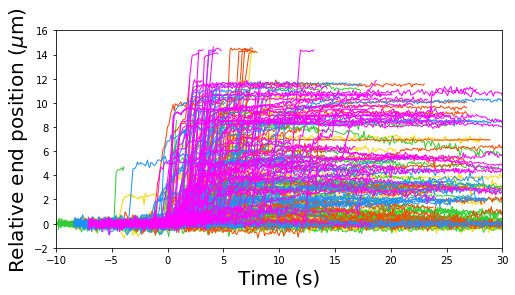

In [21]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

shift_t = [21.00,21.00,22.60,22.60]
shift_t_count = 0
for dataset,velo in [p2_150_1,p2_150_2,p2_150_3,p2_150_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "gold",
                 linewidth = 1)
    shift_t_count+=1

shift_t = [21.10,21.10,25.50,25.50]
shift_t_count = 0
for dataset,velo in [p2_175_1,p2_175_2,p2_175_3,p2_175_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "limegreen",
                 linewidth = 1)
    shift_t_count+=1
        
shift_t = [20.50,20.50,22.50,22.50]
shift_t_count = 0
for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "orangered",
                 linewidth = 1)
    shift_t_count+=1
    
shift_t = [24.00,24.00,22.10,22.10]
shift_t_count = 0
for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "dodgerblue",
                 linewidth = 1)
    shift_t_count+=1
    
shift_t = [21.00,21.00,22.60,22.60,22.10,22.10]
shift_t_count = 0
for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,
                     p2_250_4,p2_250_5,p2_250_6]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "fuchsia",
                 linewidth = 1)
    shift_t_count+=1
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-10,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
plt.show()

----

Velocity Histograms
----

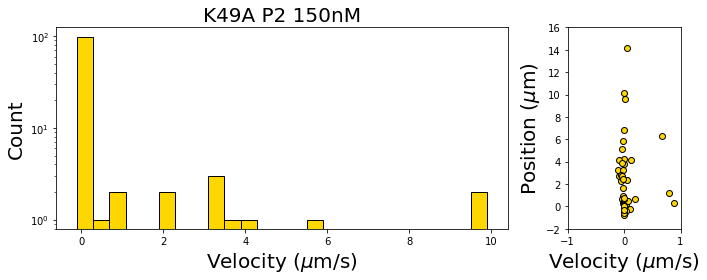

In [22]:

velocities = []
stop_positions = []

for dataset,velo in [p2_150_1,p2_150_2,p2_150_3,p2_150_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((54.04-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "gold", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("K49A P2 150nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "gold", 
            ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

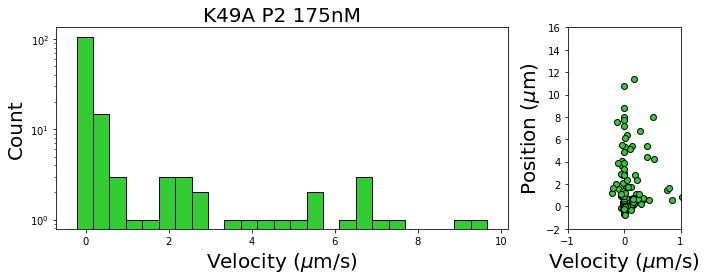

In [23]:
velocities = []
stop_positions = []

for dataset,velo in [p2_175_1,p2_175_2,p2_175_3,p2_175_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((54.37-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "limegreen", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("K49A P2 175nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "limegreen", ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

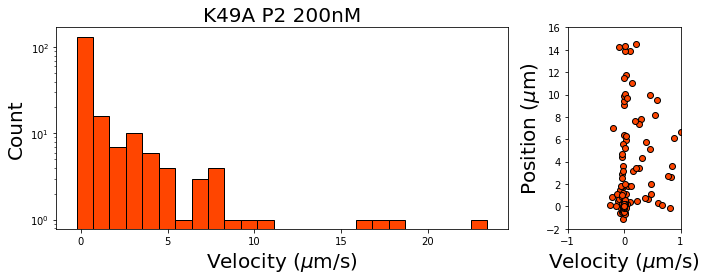

In [24]:
velocities = []
stop_positions = []

for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((55.00-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "orangered", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("K49A P2 200nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "orangered", 
            ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

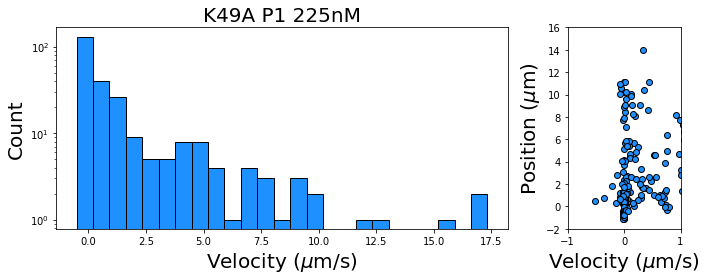

In [25]:
velocities = []
stop_positions = []

for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((53.42-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "dodgerblue", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("K49A P1 225nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "dodgerblue", 
            ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

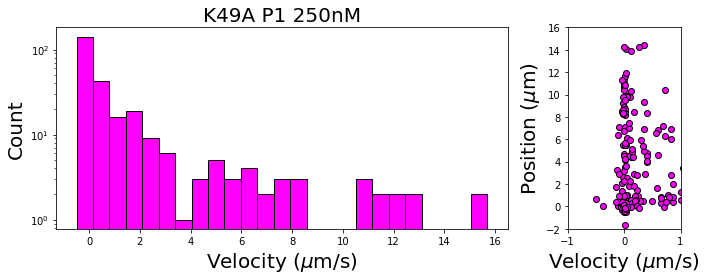

In [26]:
velocities = []
stop_positions = []

for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,
                     p2_250_4,p2_250_5,p2_250_6]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((55.44-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "fuchsia", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("K49A P1 250nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "fuchsia", 
            ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

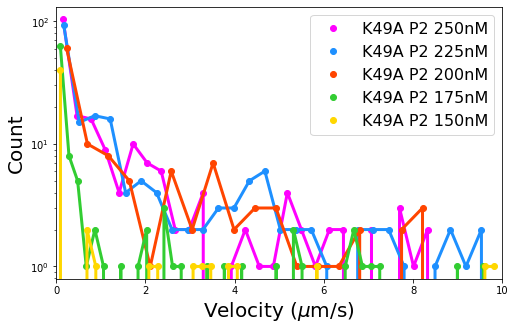

In [28]:
velocities_150 = []
for dataset,velo in [p2_150_1,p2_150_2,p2_150_3,p2_150_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_150.append(speed_rescaled)
velocities_175 = []
for dataset,velo in [p2_175_1,p2_175_2,p2_175_3,p2_175_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_175.append(speed_rescaled)
velocities_200 = []
for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_200.append(speed_rescaled)
velocities_225 = []
for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_225.append(speed_rescaled)
velocities_250 = []
for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,
                     p2_250_4,p2_250_5,p2_250_6]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_250.append(speed_rescaled)

            
plt.figure(figsize = (8,5))

n,bins = np.histogram(velocities_250, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "fuchsia", linewidth = 3)
plt.semilogy(cens,n, c = "fuchsia", marker = "o", 
             linestyle = "None", label = "K49A P2 250nM")

n,bins = np.histogram(velocities_225, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "dodgerblue", linewidth = 3)
plt.semilogy(cens,n, c = "dodgerblue", marker = "o", 
             linestyle = "None", label = "K49A P2 225nM")

n,bins = np.histogram(velocities_200, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "orangered", linewidth = 3)
plt.semilogy(cens,n, c = "orangered", marker = "o", 
             linestyle = "None", label = "K49A P2 200nM")

n,bins = np.histogram(velocities_175, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "limegreen", linewidth = 3)
plt.semilogy(cens,n, c = "limegreen", marker = "o", 
             linestyle = "None", label = "K49A P2 175nM")

n,bins = np.histogram(velocities_150, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "gold", linewidth = 3)
plt.semilogy(cens,n, c = "gold", marker = "o", 
             linestyle = "None", label = "K49A P2 150nM")


#plt.ylim(3,120)
plt.xlim(0,10)
plt.xlabel("Velocity ($\mu$m/s)", fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.legend(fontsize = 16)

plt.show()
        
        

Travel Distance
----

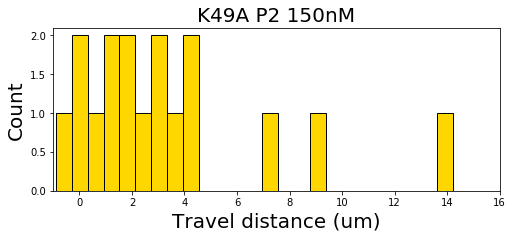

average travel distance:  3.37 um
average travel distance:  12785.62 bp


In [29]:
travel_dist = []
for dataset,velo in [p2_150_1,p2_150_2,p2_150_3,p2_150_4]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((54.04-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "gold", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("K49A P2 150nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")



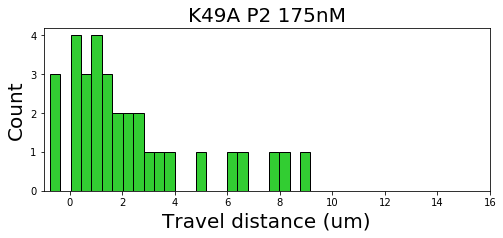

average travel distance:  2.34 um
average travel distance:  8896.53 bp


In [30]:
travel_dist = []
for dataset,velo in [p2_175_1,p2_175_2,p2_175_3,p2_175_4]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((54.379-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "limegreen", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("K49A P2 175nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")



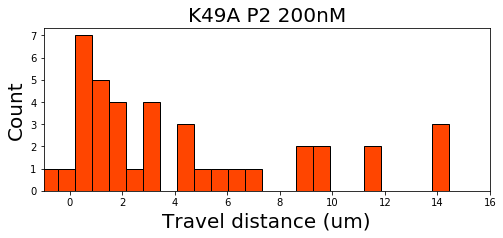

average travel distance:  4.25 um
average travel distance:  16128.41 bp


In [31]:
travel_dist = []
for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((55.00-pos)*.266)

            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "orangered", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("K49A P2 200nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")


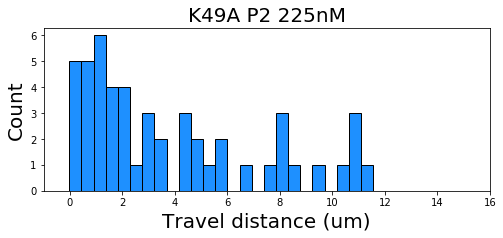

average travel distance:  3.90 um
average travel distance:  14827.14 bp


In [32]:
travel_dist = []
for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((53.419-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "dodgerblue", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("K49A P2 225nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")


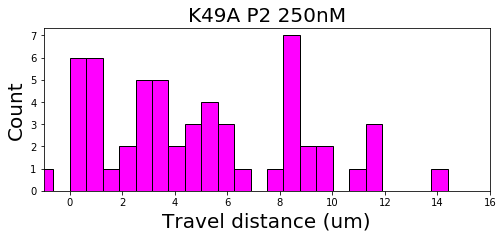

average travel distance:  4.93 um
average travel distance:  18728.40 bp


In [34]:
travel_dist = []
for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,
                     p2_250_4,p2_250_5,p2_250_6]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((55.44-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "fuchsia", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("K49A P2 250nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")


Decompaction
----

In [ ]:
D_p2_175_1, D_p2_175_2, D_p2_175_3 

D_p2_200_1, D_p2_200_2, D_p2_200_3, D_p2_200_4 

D_p2_225_1, D_p2_225_2, D_p2_225_3, D_p2_225_4 

D_p2_250_1, D_p2_250_2, D_p2_250_3, D_p2_250_4, D_p2_250_5

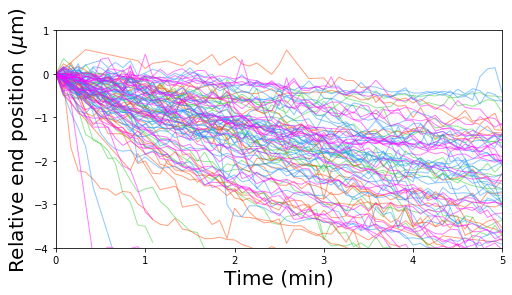

In [45]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

D = OrderedDict()
for dataset,velo in [D_p2_175_1, D_p2_175_2, D_p2_175_3]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(5/60) for i in x]
        ax1.plot(new_x, new_y, color = "limegreen", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)

for dataset,velo in [D_p2_200_1, D_p2_200_2, D_p2_200_3, D_p2_200_4]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(5/60) for i in x]
        ax1.plot(new_x, new_y, color = "orangered", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
for dataset,velo in [D_p2_225_1, D_p2_225_2, D_p2_225_3, D_p2_225_4]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(5/60) for i in x]
        ax1.plot(new_x, new_y, color = "dodgerblue", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
for dataset,velo in [D_p2_250_1, D_p2_250_2, D_p2_250_3, 
                     D_p2_250_4, D_p2_250_5]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(5/60) for i in x]
        ax1.plot(new_x, new_y, color = "fuchsia", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
        

            
ax1.set_ylim(-4,1)
ax1.set_xlim(0,5)
ax1.set_xlabel("Time (min)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
plt.show()

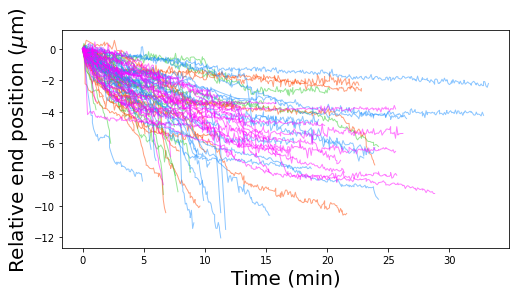

In [46]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

D = OrderedDict()
for dataset,velo in [D_p2_175_1, D_p2_175_2, D_p2_175_3]:
    for trace in dataset:
        x,y = trace        
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [round((i-x[0])*(5/60),1) for i in x]
        ax1.plot(new_x, new_y, color = "limegreen", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)

for dataset,velo in [D_p2_200_1, D_p2_200_2, D_p2_200_3, D_p2_200_4]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [round((i-x[0])*(5/60),1) for i in x]
        ax1.plot(new_x, new_y, color = "orangered", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
for dataset,velo in [D_p2_225_1, D_p2_225_2, D_p2_225_3, D_p2_225_4]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [round((i-x[0])*(5/60),1) for i in x]
        ax1.plot(new_x, new_y, color = "dodgerblue", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
for dataset,velo in [D_p2_250_1, D_p2_250_2, D_p2_250_3, 
                     D_p2_250_4, D_p2_250_5]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [round((i-x[0])*(5/60),1) for i in x]
        ax1.plot(new_x, new_y, color = "fuchsia", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
        

            

ax1.set_xlabel("Time (min)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
plt.show()

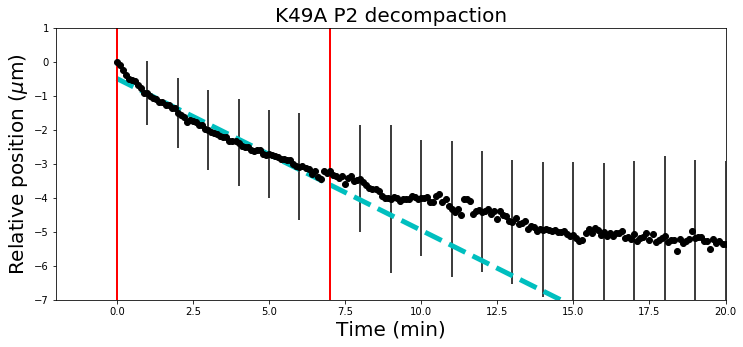

average decompaction rate:  0.45 um/min
average decompaction rate:  1696.83 bp/min


In [49]:
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))


l,r1 = 0,70
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=10, color = "k") 

p1,e = curve_fit(straight_line,t[l:r1],a[l:r1])
ax1.plot(t,straight_line(np.array(t),*p1), "c--", linewidth = 5)

ax1.axvline(x=t[l],color = "red", linewidth = 2)
ax1.axvline(x=t[r1],color = "red", linewidth = 2)

ax1.set_xlim(-2,20)
ax1.set_ylim(-7,1)
ax1.set_xlabel("Time (min)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P2 decompaction", fontsize = 20)
plt.show()

print("average decompaction rate: ","{:.2f}".format(-1*p1[0]),"um/min")
print("average decompaction rate: ","{:.2f}".format(((-1*p1[0])/.266)*(48502/48)),"bp/min")


$$
\begin{align}
\Delta \Delta G^\ddagger_{2 \to 1} = k_bT\ln \left [\frac{k_d^{(1)}}{k_d^{(2)}} \right]=k_bT\ln \left [\frac{v^{(1)}}{v^{(2)}} \right]
\end{align}
$$


In [3]:
print("relative to WT P1 --> ΔΔG = ","{:.2f}".format(np.log(0.45/0.46)),"kT") 
print("relative to WT P2 --> ΔΔG = ","{:.2f}".format(np.log(0.45/0.27)),"kT") 
print("relative to K49A P1 --> ΔΔG = ","{:.2f}".format(np.log(0.45/0.99)),"kT")

relative to WT P1 --> ΔΔG =  -0.02 kT
relative to WT P2 --> ΔΔG =  0.51 kT
relative to K49A P1 --> ΔΔG =  -0.77 kT
